## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [7]:
# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [8]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on= "Mouse ID", how="left")
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice.
total_mice = merged_df["Mouse ID"].nunique()
#nunique calculates the dustubct values in a column
print(total_mice)

249


In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
drop_dup_id = merged_df.loc[merged_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
drop_dup_id

array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
deduped_df =merged_df[merged_df["Mouse ID"].isin(drop_dup_id)==True]
deduped_df.head(30)
#need to explain "isin usage"; also is there a way to display all?

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
deduped_df =merged_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
deduped_df.head()
# deduped_df =merged_df[merged_df["Mouse ID"].isin(drop_dup_id)==False]
# sort_by_time = deduped_df.sort_values("Timepoint", ascending= True)
# sort_by_time.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice= deduped_df["Mouse ID"].nunique()
cleaned_mice

249

## Summary Statistics

In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
r_avg = merged_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
r_med = merged_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
r_var = merged_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
r_sd = merged_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
r_sem = merged_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = pd.DataFrame({"Mean":r_avg,"Median":r_med,"Variance":r_var,"Standard Deviation":r_sd,"SEM":r_sem})
summary
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

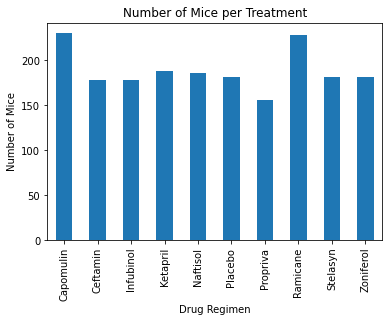

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_v_regimen = deduped_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_v_regimen.plot.bar()

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

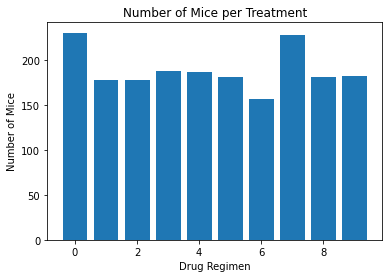

In [64]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_v_regimen_list = deduped_df.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()

drug_r = np.arange(len(mice_v_regimen))
plt.bar(drug_r, mice_v_regimen_list)

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = merged_df.groupby(["Mouse ID","Sex"])
gender_df = pd.DataFrame(gender.size())
gender_df

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# gender_df
mouse_gender

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


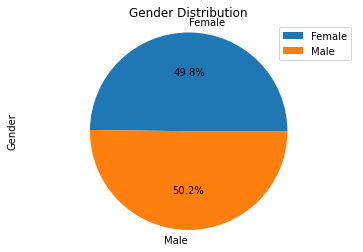

In [79]:
#  Generate a pie plot showing the distribution of female versus male mice us
plot = mouse_gender.plot.pie(y="Total Count", autopct="%1.1f%%")

plt.ylabel("Gender")
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

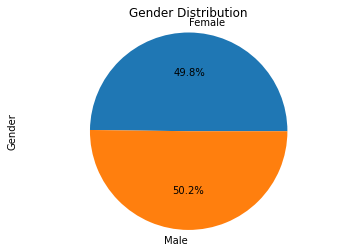

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = ["49.8","50.2"]
#how can I automatically input this instead of calculating it externally?
plt.pie(sizes,labels=labels,autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Gender')
plt.title("Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [88]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = deduped_df.loc[deduped_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = deduped_df.loc[deduped_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = deduped_df.loc[deduped_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df =deduped_df.loc[deduped_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
cap_timepoint = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
cap_vol = pd.DataFrame(cap_timepoint)

ram_timepoint = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ram_vol = pd.DataFrame(ram_timepoint)

inf_timepoint = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
inf_vol = pd.DataFrame(inf_timepoint)

cef_timepoint = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
cef_vol = pd.DataFrame(cef_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merged = pd.merge(cap_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
cap_merged.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [89]:
ram_merged = pd.merge(ram_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
ram_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [91]:
inf_merged = pd.merge(inf_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
inf_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [90]:
cef_merged = pd.merge(cef_vol,merged_df,on=("Mouse ID","Timepoint"),how="left")
cef_merged.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
